# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [196]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [198]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [199]:
data = pd.read_csv('day.csv', parse_dates=[0])

In [200]:
train, test = train_test_split(data, test_size=0.2)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Построим матрицу кореляции, чтобы определить сильно зависимые признаки и исключить их из дальнейшего рассмотрения

<Axes: >

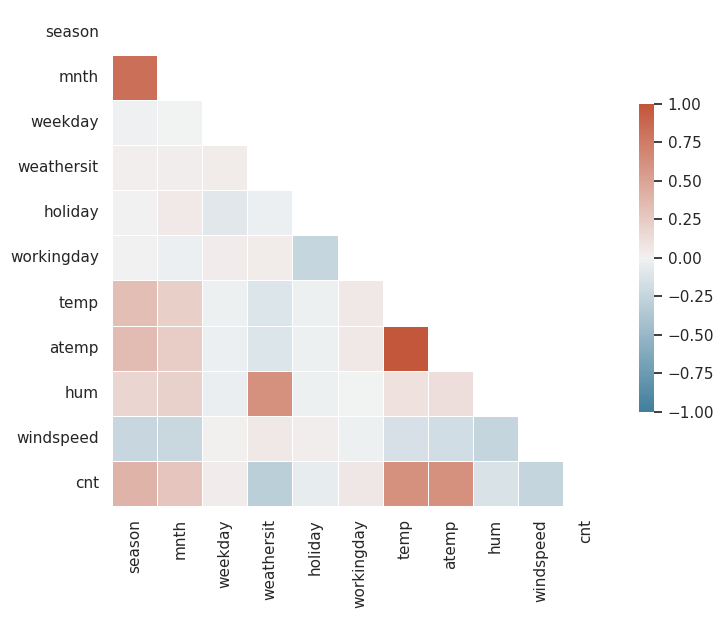

In [201]:
sns.set_theme(style="white")

columns = ['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
d = train[columns]
corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Как видно из матрицы признаки mnth и season, temp и atemp сильно зависимы, поэтому далее из них ьбудем рассматривать только mnth и temp.

Разделим признаки на вещественные и категориальные

In [202]:
categorial_features = ['holiday', 'workingday', 'mnth', 'weekday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

Далее посмотрим визуализацию совместных распределений вещественных признаков разбив данные по категориальным признакам

In [203]:
# функция построения зависимости вещественных признаков от категориальных
def make_gr(hue) :
    g = sns.PairGrid(train[['temp', 'hum', 'windspeed', 'cnt', hue]],
                    hue=hue, diag_sharey=False, height=3)

    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6,
              common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

    g.add_legend()

Построим графики для всех категориальных признаков но в ноутбуке оставим только, те для которых были обнаружены какие либо зависимости

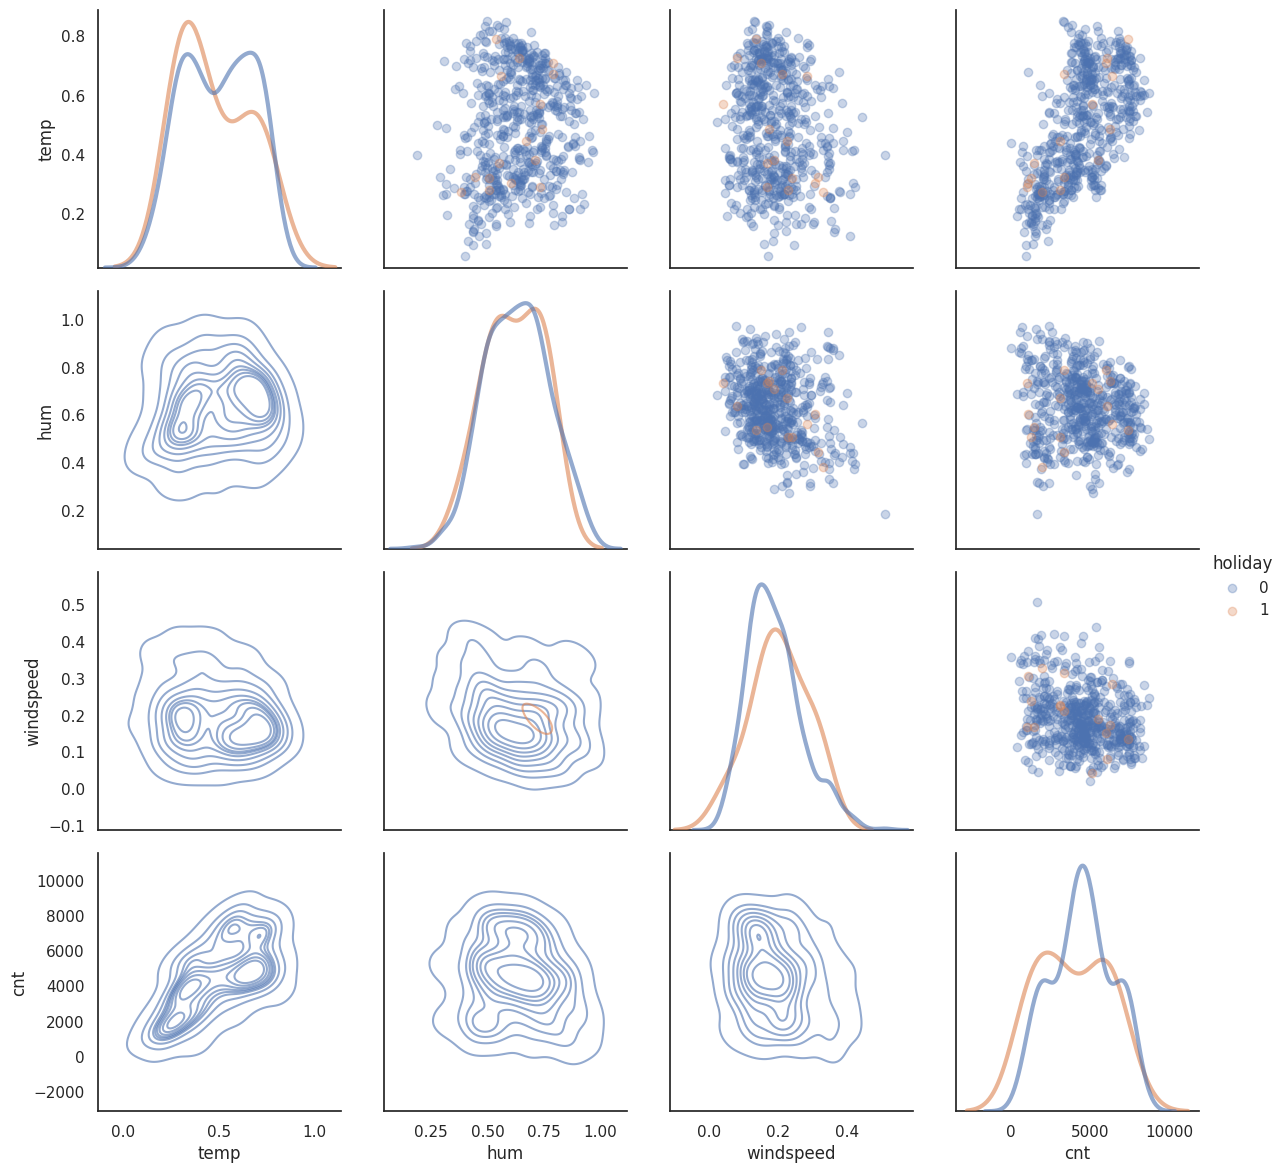

In [204]:
make_gr( 'holiday')

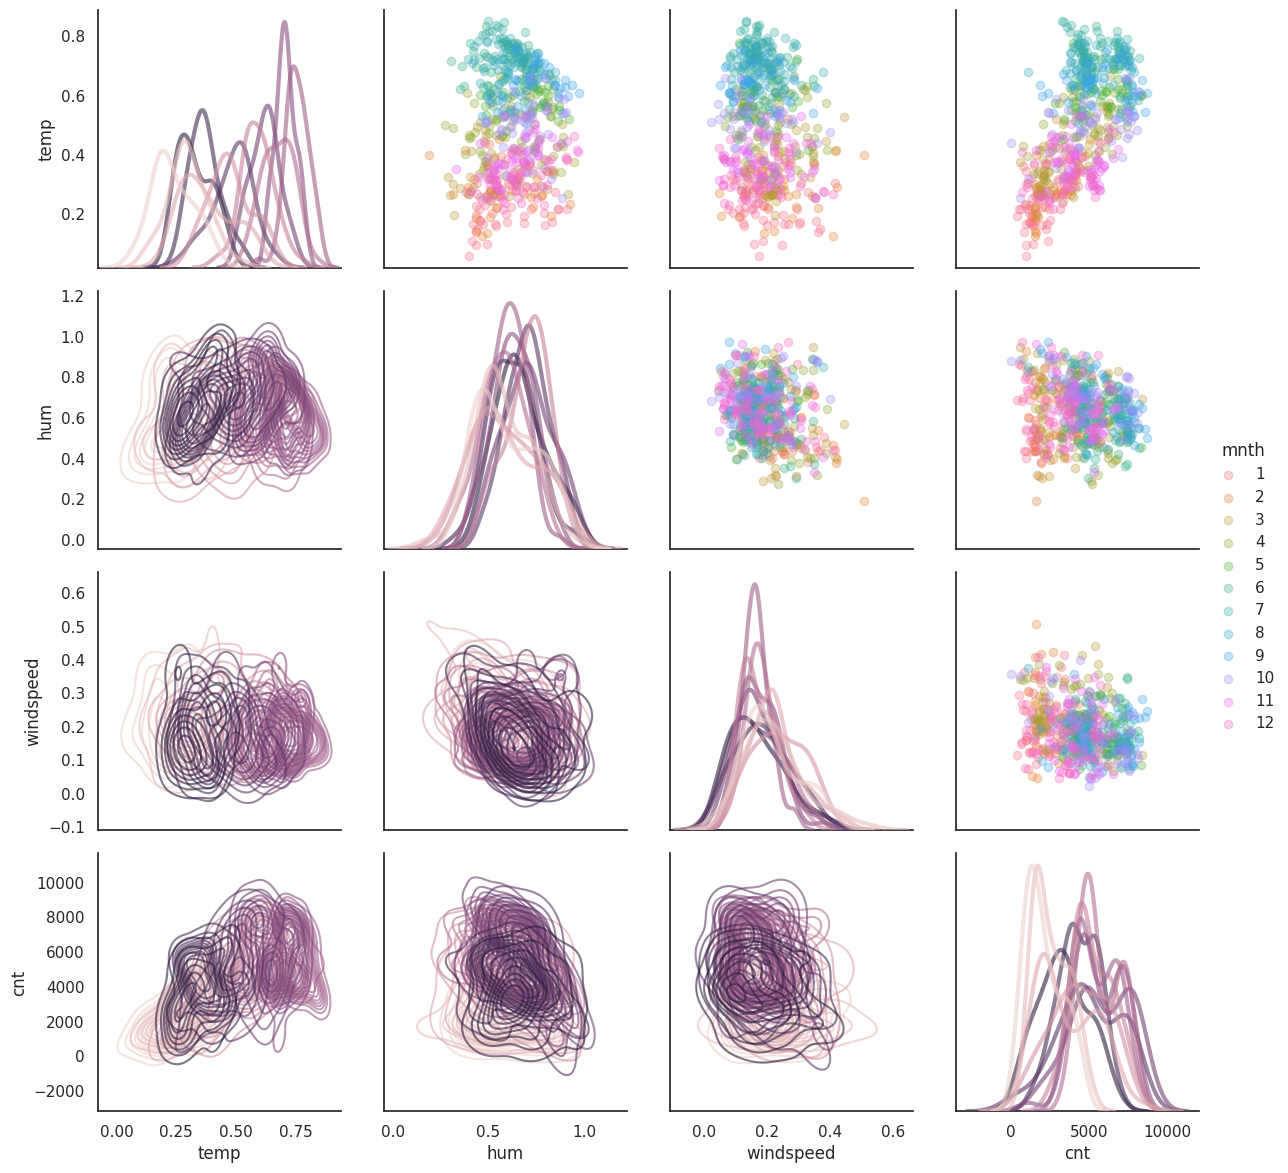

In [205]:
make_gr( 'mnth')

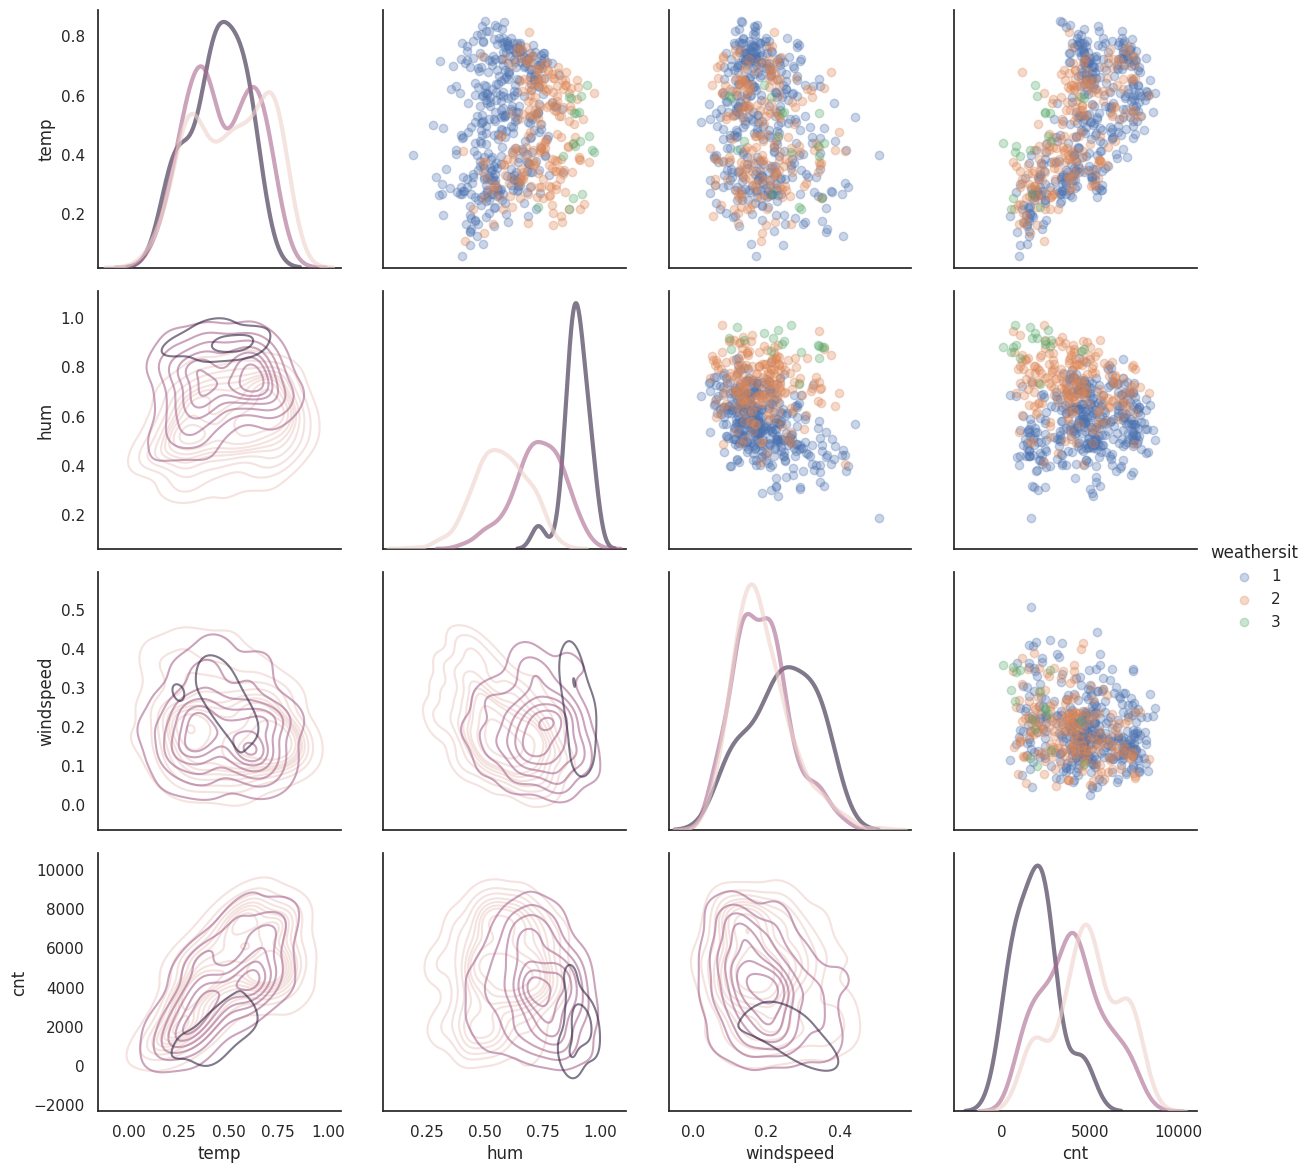

In [206]:
make_gr('weathersit')

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** \\
1) среди данных есть явные выбросы по параметру hum и windspeed  \\
2) из матрицы корреляции atempt, season необходимо не учитывать  \\
3) holiday очень мало данных в категории 1, и категория заметно не влияет на целевой признак

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a)** удалить выбросы hum (<0.3) и windspeed (>0.4) \\
**б)** преобразовать категориальные переменные, и исключить одну категорию \\
**в)** нормализовывать данные нам не нужно, т.к. они нам даны уже нормализованными  

Реализуйте данную процедуру.

In [207]:
# удаляем выбросы
train = train.loc[(train['hum'] > 0.3) & (train['windspeed'] < 0.4)]

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(574, 24)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [208]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [209]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])
#выполним предсказание
test_preds = model.predict(X_test)

In [210]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [211]:
print('RMSE: ', np.sqrt(((test[target_feature] - test_preds) ** 2).mean()))
print('MAE: ',  metrics.mean_absolute_error(test[target_feature], test_preds))
print('MAPE:', mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE:  1317.9584999559936
MAE:  1120.9954131079076
MAPE: 32.21325080838808


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

выведем полученные коэффициенты

In [212]:
model.coef_

array([ 7304.76056759, -3888.74236284, -4448.00559651,  -362.73753654,
         295.90038916,    87.08421701,   425.80747875,   709.32969772,
         778.21868971,   162.48062257,  -634.39381524,   -25.17395926,
        1196.18451866,  1458.33054622,  1279.73196753,   751.12071789,
         -54.77047637,    11.93824831,    45.90995604,   -21.49849879,
         -48.41637658,   366.28615593,  -107.31359469, -1452.84004192])

In [213]:
model.intercept_

3498.9485859372735

__Формула:__
$$\widehat{\theta} = (X^TX)^{-1}X^TY$$

In [214]:
def get_coeff_mnk(X_train, Y_train):
    E_X = np.ones((X_train.shape[0], 1))  # столбец единиц для свободного члена
    X = np.hstack((E_X, X_train))
    X_psuedo = np.linalg.inv(X.T @ X) @ X.T
    return X_psuedo @ Y_train

Coeff = get_coeff_mnk(X_train, train[target_feature])
Coeff[1:]

array([-4.20473616e+17, -3.92476129e+17,  1.65894655e+17,  3.08207607e+18,
        1.50366610e+18,  1.02129423e+17,  9.72576556e+16,  1.77205018e+17,
        2.13729516e+17,  2.36855665e+17,  3.00515508e+17,  3.41835820e+17,
        2.02773501e+17,  1.93755331e+17,  1.06409689e+17,  1.61826895e+17,
       -2.30980769e+18, -1.33453318e+18, -9.34929421e+17, -1.50366610e+18,
       -1.70719780e+18,  6.27453867e+02, -1.10355762e+03, -5.02930085e+03])

In [215]:
Coeff[0]

1.9949892044548006e+17

In [216]:
test_preds = np.hstack((np.ones((X_test.shape[0], 1)), X_test)) @ Coeff
print('RMSE: ', np.sqrt(((test[target_feature] - test_preds) ** 2).mean()))
print('MAE: ',  metrics.mean_absolute_error(test[target_feature], test_preds))
print('MAPE:', mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE:  4.2076390175366586e+17
MAE:  2.9452841823991744e+17
MAPE: 9594054182373754.0


Проблема в том, что среди данных есть линейно зависимые столбцы

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [217]:
real_features_independent = ['temp', 'hum', 'windspeed']
categorial_features_independent = ['mnth', 'holiday', 'workingday']

encoder_independent = OneHotEncoder(drop='first', sparse=False)  # объявляем новую модель
train_cat_independent = encoder_independent.fit_transform(train[categorial_features_independent])  # обучаем и кодируем

# соединим вместе вещественные признаки и закодированные категориальные
X_train_independent = np.hstack([train[real_features_independent], train_cat_independent])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [218]:
# Получаем новый коэффициент
Coeff_independent = get_coeff_mnk(X_train_independent, train[target_feature])
print(Coeff_independent[0])
Coeff_independent[1:]

4230.833866751601


array([ 7.71621259e+03, -4.80047882e+03, -5.19858317e+03,  4.39027917e+01,
        3.74107467e+02,  5.88066174e+02,  7.19313273e+02,  1.71449687e+00,
       -8.65319482e+02, -1.83468213e+02,  1.04567425e+03,  1.29972704e+03,
        1.20884031e+03,  7.10051934e+02, -5.41717935e+02,  8.48630527e+01])

In [219]:
# Кодируем категориальные признаки, которые не являются зависимыми
test_cat_independent = encoder_independent.transform(test[categorial_features_independent])

# Соединяем данные
X_test_independent = np.hstack([test[real_features_independent], test_cat_independent])

In [220]:
test_preds = np.hstack((np.ones((X_test_independent.shape[0], 1)), X_test_independent)) @ Coeff_independent
print('RMSE: ', np.sqrt(((test[target_feature] - test_preds) ** 2).mean()))
print('MAE: ',  metrics.mean_absolute_error(test[target_feature], test_preds))
print('MAPE:', mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE:  1399.0707470054374
MAE:  1155.6633445708985
MAPE: 35.94437180402315


Сделайте выводы.

**Выводы:** Действительно, удаление сильно зависимых столбцов и столбцов с малым количеством информации, помогло значительно увеличить точность, кроме того два метода расчета дали близкие результаты и с достаточно хорошей точностью для данного метода смогли предсказывать целевой признак.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [221]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        self.lambd = lambd
        self.fit_intercept = fit_intercept


    def fit(self, X, Y):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.Coeff = np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ X.T @ Y
        return self


    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        predictions = (X @ self.Coeff)
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [222]:
train_validate, test = train_test_split(data, test_size=0.2)
train, validate = train_test_split(train_validate, test_size=0.25)
train = train.loc[(train['hum'] > 0.3) & (train['windspeed'] < 0.4)]
train.shape, validate.shape, test.shape

((426, 16), (146, 16), (147, 16))

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [223]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])
X_train.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(426, 24)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [224]:
lambds = np.logspace(-2, 4, 100)
models = []
for lambd in lambds:
    model = RidgeRegression(lambd)
    model.fit(X_train, train[target_feature])
    models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [225]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
validate_cat = encoder.transform(validate[categorial_features])
# Соединяем данные
X_validate = np.hstack([validate[real_features], validate_cat])
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
train_cat = encoder.transform(train[categorial_features])
# Соединяем данные
X_train = np.hstack([train[real_features], train_cat])

In [226]:
errors_validate = [[], [], []]
for model in models:
  test_preds = model.predict(X_validate)
  errors_validate[0].append(np.sqrt(((validate[target_feature] - test_preds) ** 2).mean()))
  errors_validate[1].append(metrics.mean_absolute_error(validate[target_feature], test_preds))
  errors_validate[2].append(mean_absolute_percentage_error(validate[target_feature], test_preds))

errors_train = [[], [], []]
for model in models:
  test_preds= model.predict(X_train)
  errors_train[0].append(np.sqrt(((train[target_feature] - test_preds) ** 2).mean()))
  errors_train[1].append(metrics.mean_absolute_error(train[target_feature], test_preds))
  errors_train[2].append(mean_absolute_percentage_error(train[target_feature], test_preds))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

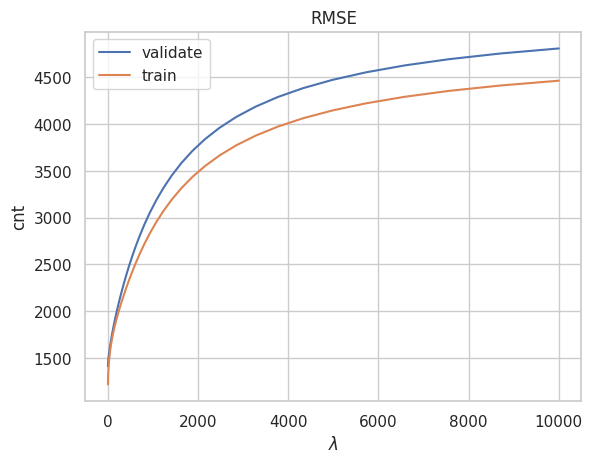

In [227]:
# строим графики
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.title('RMSE')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('cnt')
    sns.lineplot(x=lambds, y=errors_validate[0], label='validate')
    sns.lineplot(x=lambds, y=errors_train[0], label='train')

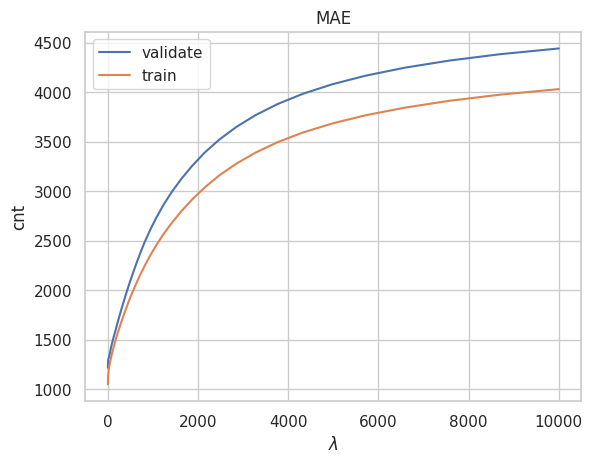

In [228]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.title('MAE')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('cnt')
    sns.lineplot(x=lambds, y=errors_validate[1], label='validate')
    sns.lineplot(x=lambds, y=errors_train[1], label='train')

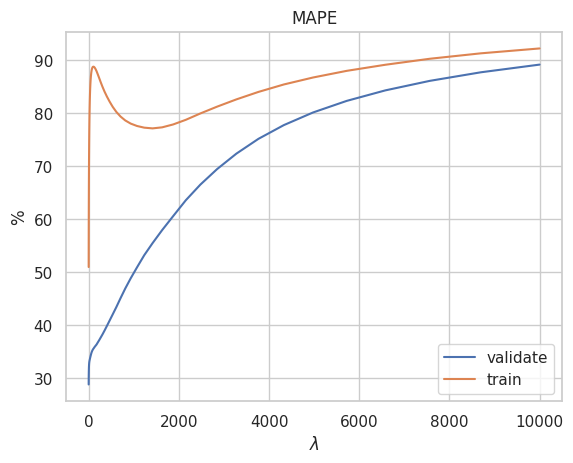

In [229]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.title('MAPE')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('%')
    sns.lineplot(x=lambds, y=errors_validate[2], label='validate')
    sns.lineplot(x=lambds, y=errors_train[2], label='train')

как мы видим самая всокая точность достигается при $\lambda$ близких к 0, поэтому построим еще один график для MAPE где оставим только малые значения $\lambda$.

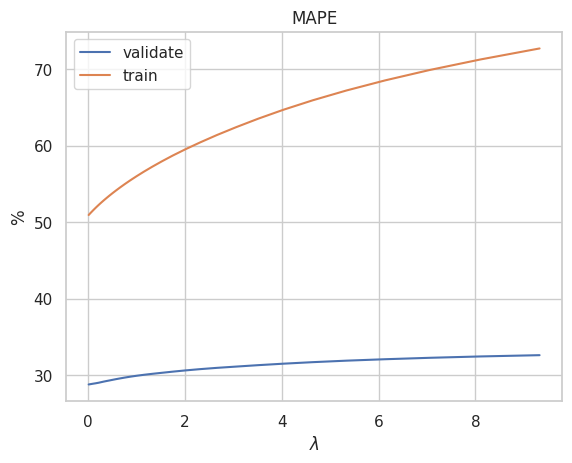

In [230]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.title('MAPE')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('%')
    sns.lineplot(x=lambds[:50], y=errors_validate[2][:50], label='validate')
    sns.lineplot(x=lambds[:50], y=errors_train[2][:50], label='train')

Как видно из графика чем меньше $\lambda$ тем выше точность, оптимальное $\lambda = 0.1$

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [231]:
coefficients = []
for model in models:
    coefficients.append(model.Coeff)

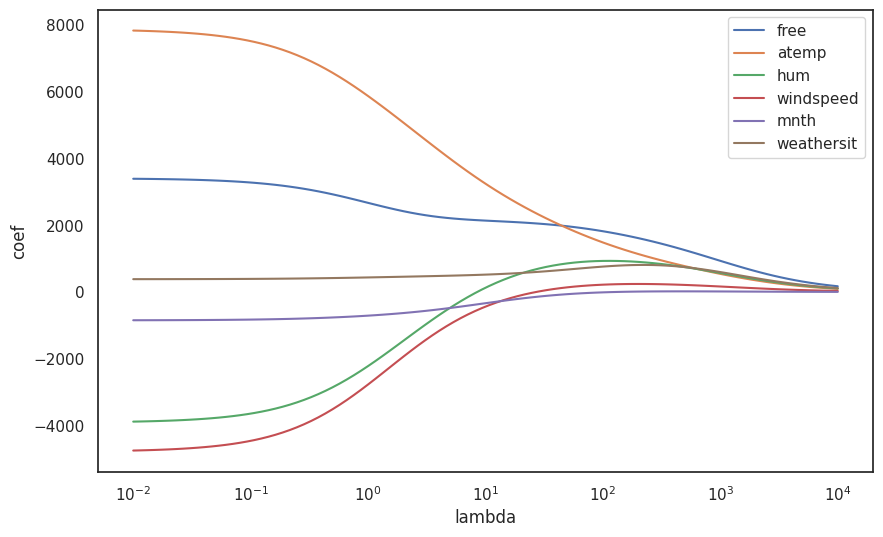

In [232]:
coefs = np.array(coefficients).T
plt.figure(figsize=(10, 6))

for coef, feature in zip(coefs, ['free', 'atemp', 'hum', 'windspeed', 'mnth', 'weathersit']):
    plt.semilogx(lambds, coef, label=feature)

plt.xlabel('lambda')
plt.ylabel('coef')
plt.legend()
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [238]:
lambd_optimal = 0.1
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])
# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

# обучаем модель
model = RidgeRegression(lambd_optimal)
model.fit(X_train, train[target_feature])
models.append(model)

#вычисляем ошибки
test_preds = model.predict(X_test)

print('RMSE: ', np.sqrt(((test[target_feature] - test_preds) ** 2).mean()))
print('MAE: ',  metrics.mean_absolute_error(test[target_feature], test_preds))
print('MAPE:', mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE:  1384.0441180992011
MAE:  1137.7030643472199
MAPE: 36.56881566016986


Сделайте выводы. \\
Ridge regression помогла улучшить точность, по сравнению с пунктом 2. Поэтому в дальнейшем будем использовать ее для обучения линейных моделей

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [234]:
Coeff_rrsgd = np.zeros((X_train.shape[1] + 1, 1))

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.